In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [102]:
df = pd.read_excel('영화데이터.xlsx')

In [103]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,한국개봉편수,한국상영편수,한국매출액,한국관객수,한국점유율,국외개봉편수,국외상영편수,국외매출액,국외관객수,국외점유율,전체개봉편수,전체상영편수,전체매출액,전체관객수
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00
mean,50.19,151.20,59880748430.53,7194310.61,0.48,94.45,276.61,56768771647.16,6661169.86,0.52,144.64,427.81,116649520077.69,13855480.48
std,20.24,41.96,43371621755.16,5329158.05,0.20,16.33,40.22,31284158098.39,3763536.68,0.20,27.54,71.72,60052466924.33,7527005.72
min,13.00,77.00,1120062760.00,139399.00,0.08,59.00,186.00,6188887330.00,726579.00,0.09,76.00,276.00,7515666040.00,972572.00
25%,33.00,128.00,25837246843.25,3254918.25,0.33,83.75,245.00,29638201834.00,2893637.75,0.36,128.50,379.00,65312468555.25,6860542.00
50%,51.00,145.50,53122870393.50,6377572.50,0.46,94.50,271.50,57876930722.00,6897473.00,0.54,147.00,428.00,122535094858.50,14796012.50
75%,65.00,171.00,86541218725.00,10384644.00,0.64,104.25,300.00,76850512349.00,9299333.00,0.67,160.00,460.25,155952473092.75,18620560.75
max,97.00,291.00,186170649912.00,22208501.00,0.91,139.00,391.00,158725114684.00,18575725.00,0.92,215.00,651.00,252527529370.00,30902141.00


In [104]:
df = df[:96]

In [105]:
df.columns

Index(['년월', '한국개봉편수', '한국상영편수', '한국매출액', '한국관객수', '한국점유율', '국외개봉편수', '국외상영편수',
       '국외매출액', '국외관객수', '국외점유율', '전체개봉편수', '전체상영편수', '전체매출액', '전체관객수'],
      dtype='object')

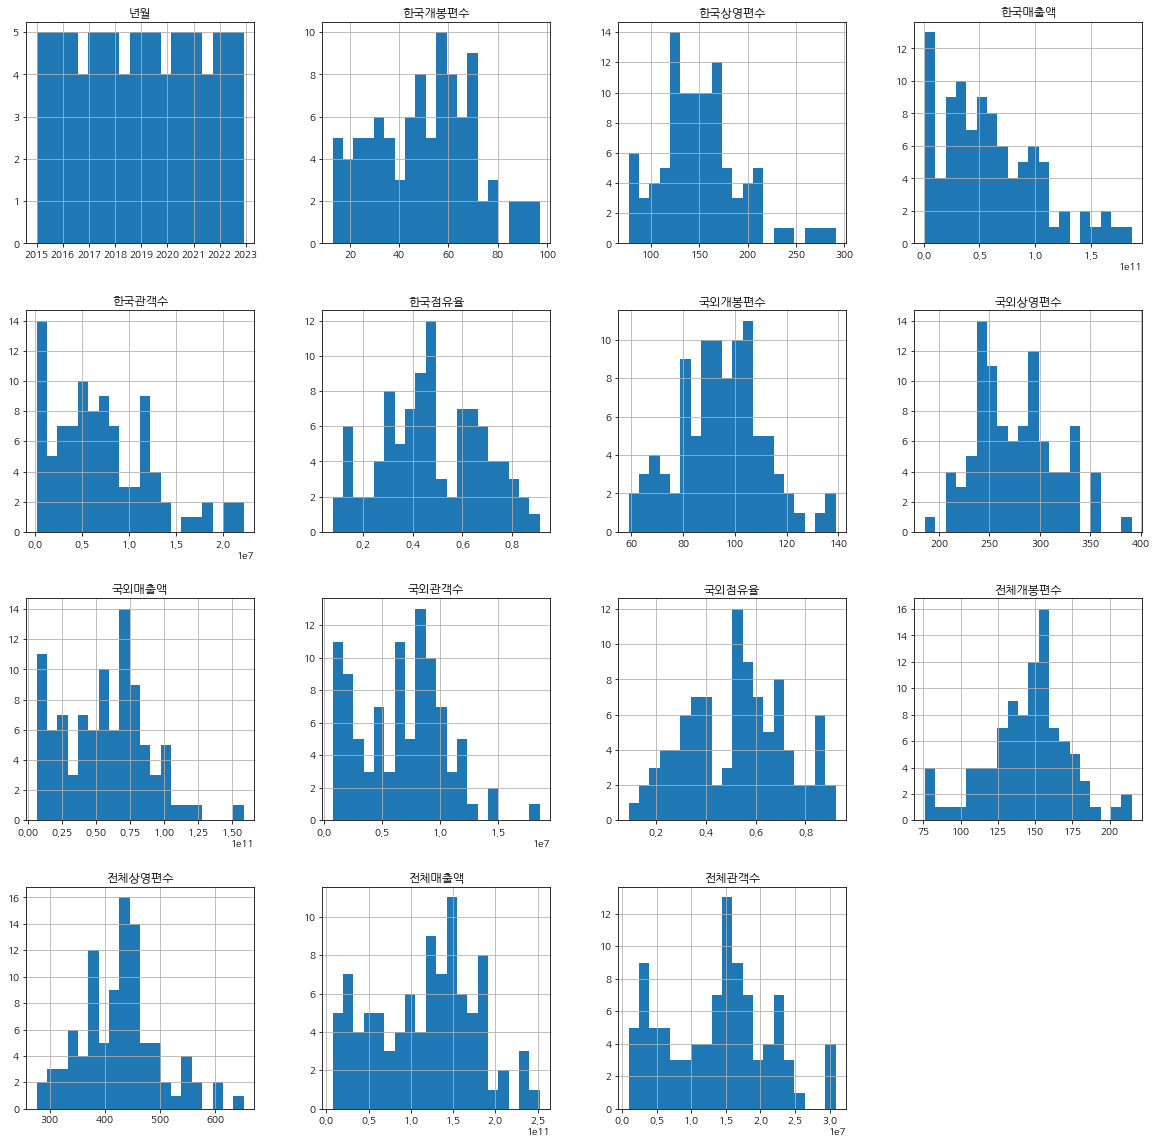

In [106]:
df.hist(bins=20, figsize=(20,20))
plt.show()

In [107]:
pip install koreanize-matplotlib

In [108]:
import koreanize_matplotlib

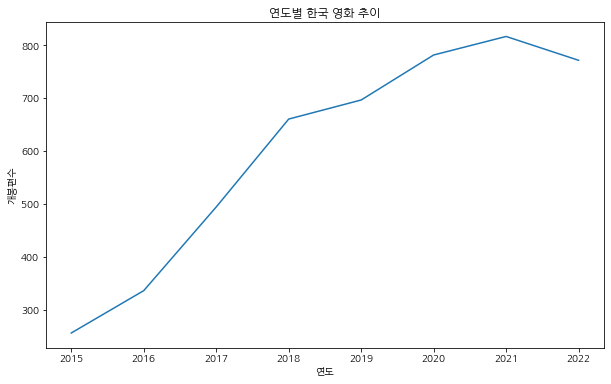

In [109]:
# '년월' 컬럼의 데이터를 날짜 형식으로 변환
df['년월'] = pd.to_datetime(df['년월'], format='%Y-%m')

# 월별로 그룹화하여 데이터의 합계 계산
df_grouped = df.groupby(df['년월'].dt.year).sum()

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('연도별 한국 영화 추이')
plt.xlabel('연도')
plt.ylabel('개봉편수')

# 개봉 편수 추이 그래프
plt.plot(df_grouped.index, df_grouped['한국개봉편수'], label='개봉 편수')

In [110]:
df.index

RangeIndex(start=0, stop=96, step=1)

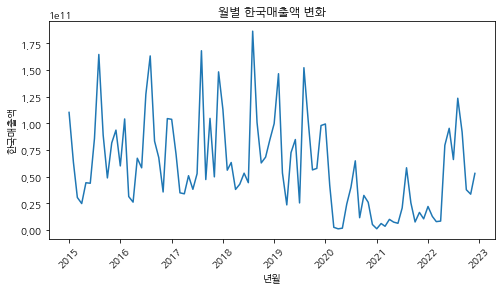

In [111]:
plt.figure(figsize=(8, 4))
plt.plot(df['년월'], df['한국매출액'])
plt.xlabel('년월')
plt.ylabel('한국매출액')
plt.title('월별 한국매출액 변화')
plt.xticks(rotation=45)
plt.show()

In [112]:
df['년월'] = pd.to_datetime(df['년월'])

In [113]:
df['년월'] = df['년월'].astype('str')

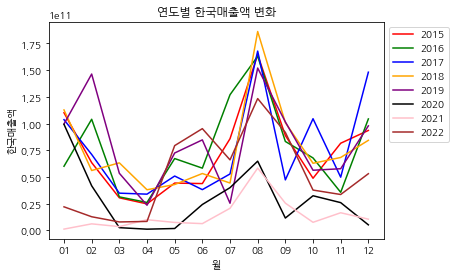

In [114]:
# 년도와 월을 분리
def remove_comma(x):
    if isinstance(x, str):
        return x.replace(',', '')
    return x

df = df.applymap(remove_comma)

df['년도'] = df['년월'].str.split('-').str[0]
df['월'] = df['년월'].str.split('-').str[1]

# 월별 한국매출액 변화 시각화
colors = ['red', 'green', 'blue', 'orange', 'purple', 'black', 'pink', 'brown', 'gray']
fig, ax = plt.subplots()

for i, year in enumerate(df['년도'].unique()):
    year_df = df[df['년도'] == year]
    ax.plot(year_df['월'], year_df['한국매출액'], color=colors[i], label=year)

ax.set_xlabel('월')
ax.set_ylabel('한국매출액')
ax.set_title('연도별 한국매출액 변화')
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

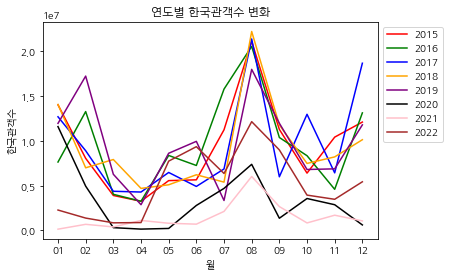

In [115]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'black', 'pink', 'brown', 'gray']
fig, ax = plt.subplots()

for i, year in enumerate(df['년도'].unique()):
    year_df = df[df['년도'] == year]
    ax.plot(year_df['월'], year_df['한국관객수'], color=colors[i], label=year)

ax.set_xlabel('월')
ax.set_ylabel('한국관객수')
ax.set_title('연도별 한국관객수 변화')
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

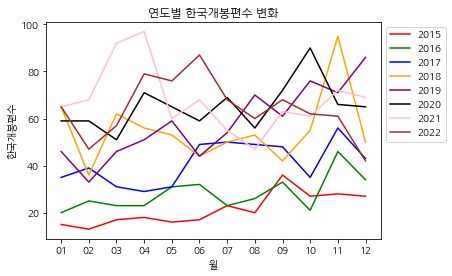

In [116]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'black', 'pink', 'brown', 'gray']
fig, ax = plt.subplots()

for i, year in enumerate(df['년도'].unique()):
    year_df = df[df['년도'] == year]
    ax.plot(year_df['월'], year_df['한국개봉편수'], color=colors[i], label=year)

ax.set_xlabel('월')
ax.set_ylabel('한국개봉편수')
ax.set_title('연도별 한국개봉편수 변화')
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

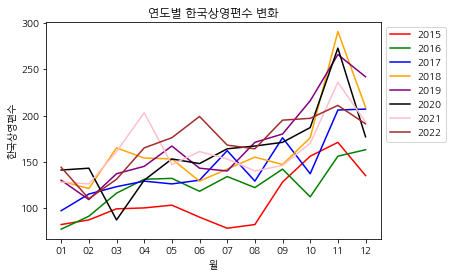

In [117]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'black', 'pink', 'brown', 'gray']
fig, ax = plt.subplots()

for i, year in enumerate(df['년도'].unique()):
    year_df = df[df['년도'] == year]
    ax.plot(year_df['월'], year_df['한국상영편수'], color=colors[i], label=year)

ax.set_xlabel('월')
ax.set_ylabel('한국상영편수')
ax.set_title('연도별 한국상영편수 변화')
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

In [118]:
df['년도'] = df['년도'].astype(np.int)
df['월'] = df['월'].astype(np.int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년월      96 non-null     object 
 1   한국개봉편수  96 non-null     int64  
 2   한국상영편수  96 non-null     int64  
 3   한국매출액   96 non-null     int64  
 4   한국관객수   96 non-null     int64  
 5   한국점유율   96 non-null     float64
 6   국외개봉편수  96 non-null     int64  
 7   국외상영편수  96 non-null     int64  
 8   국외매출액   96 non-null     int64  
 9   국외관객수   96 non-null     int64  
 10  국외점유율   96 non-null     float64
 11  전체개봉편수  96 non-null     int64  
 12  전체상영편수  96 non-null     int64  
 13  전체매출액   96 non-null     int64  
 14  전체관객수   96 non-null     int64  
 15  년도      96 non-null     int32  
 16  월       96 non-null     int32  
dtypes: float64(2), int32(2), int64(12), object(1)
memory usage: 12.1+ KB


C:\Users\k9711\AppData\Local\Temp/ipykernel_5396/234132395.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['년도'] = df['년도'].astype(np.int)
C:\Users\k9711\AppData\Local\Temp/ipykernel_5396/234132395.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link

In [119]:
df['가격'] = 8500
price_increase_points = [(2016,3), (2016,4), (2016,7),(2018,4),(2020,10),
                        (2020,12),(2021,4),(2021,7),(2022,4),(2022,7)]
average_prices = [9500,10000,10166,11166,11500,12500,12833,13500,13833,14500]

# 불린 인덱싱을 활용하여 평균 관람가격 설정
for i in range(len(price_increase_points)):
    start_year, start_month = price_increase_points[i]
    price = average_prices[i]
    df.loc[(df['년도'] > start_year) | ((df['년도'] == start_year) 
    & (df['월'] >= start_month)), '가격'] = price

df['가격'].value_counts()

11166    30
10166    21
8500     14
13500     9
14500     6
12500     4
10000     3
12833     3
13833     3
11500     2
9500      1
Name: 가격, dtype: int64

C:\Users\k9711\AppData\Local\Temp/ipykernel_5396/839020841.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['년월'], rotation='vertical')


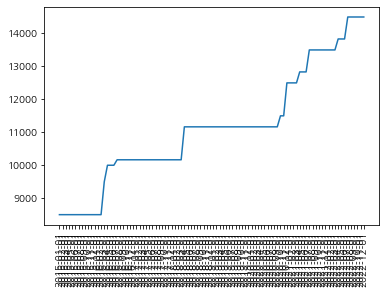

In [120]:
fig, ax = plt.subplots()
ax.plot(df['년월'], df['가격'])
ax.set_xticklabels(df['년월'], rotation='vertical')
plt.show()

In [122]:
df1 =df.drop(columns=['년도','한국상영편수','국외개봉편수', '국외상영편수',
       '국외매출액', '국외관객수', '국외점유율', '전체개봉편수', '전체상영편수', '전체매출액', '전체관객수', '월',
       ], inplace=False)
df1

,년월,한국개봉편수,한국매출액,한국관객수,한국점유율,가격
0,2015-01-01,15,110123050402,14019496,0.62,8500
1,2015-02-01,13,63402259578,8048675,0.48,8500
2,2015-03-01,17,30469065119,3899544,0.34,8500
3,2015-04-01,18,24782124375,3255669,0.26,8500
4,2015-05-01,16,44274804858,5560234,0.32,8500
...,...,...,...,...,...,...
91,2022-08-01,60,123376977426,12143049,0.81,14500
92,2022-09-01,68,91709095309,8987768,0.91,14500
93,2022-10-01,62,37718830381,3941727,0.64,14500
94,2022-11-01,61,33577758845,3474586,0.55,14500


In [125]:
df_corr = df1.corr()
print(df_corr.loc[df_corr["한국개봉편수"]>0 ,"한국개봉편수"].sort_values(ascending=False))
print(df_corr.loc[df_corr["한국개봉편수"]<0 ,"한국개봉편수"].sort_values(ascending=True))

한국개봉편수   1.00
가격       0.70
Name: 한국개봉편수, dtype: float64
한국관객수   -0.34
한국매출액   -0.29
한국점유율   -0.07
Name: 한국개봉편수, dtype: float64


In [22]:
print(df_corr.loc[df_corr["전체매출액"]>0 ,"전체매출액"].sort_values(ascending=False))
print(df_corr.loc[df_corr["전체매출액"]<0 ,"전체매출액"].sort_values(ascending=True))

전체매출액    1.00
전체관객수    0.99
한국관객수    0.87
한국매출액    0.87
국외관객수    0.74
국외매출액    0.72
한국점유율    0.38
국외개봉편수   0.22
월        0.13
국외상영편수   0.08
Name: 전체매출액, dtype: float64
년도       -0.51
한국개봉편수   -0.40
가격       -0.40
국외점유율    -0.38
전체개봉편수   -0.17
한국상영편수   -0.13
전체상영편수   -0.03
Name: 전체매출액, dtype: float64


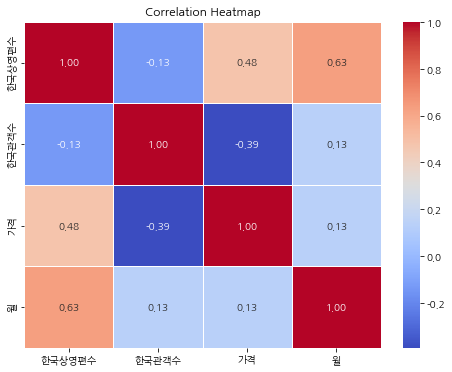

In [39]:
# 상관관계 히트맵
import seaborn as sns
columns = ['한국상영편수', '한국관객수', '가격','월']
corr = df[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [126]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 정규화 객체 생성
scaler = MinMaxScaler()

# 가격 정규화
df['정규화가격'] = scaler.fit_transform(df['가격'].values.reshape(-1, 1))

# 매출액 정규화
df['정규화매출액'] = scaler.fit_transform(df['한국매출액'].values.reshape(-1, 1))

# 매출액 정규화
df['정규화관객수'] = scaler.fit_transform(df['한국관객수'].values.reshape(-1, 1))

# 매출/관객 정규화
df['매출/관객']=df['한국매출액']/ df['한국관객수'] 
df['정규화매출/관객'] = scaler.fit_transform(df['매출/관객'].values.reshape(-1, 1))

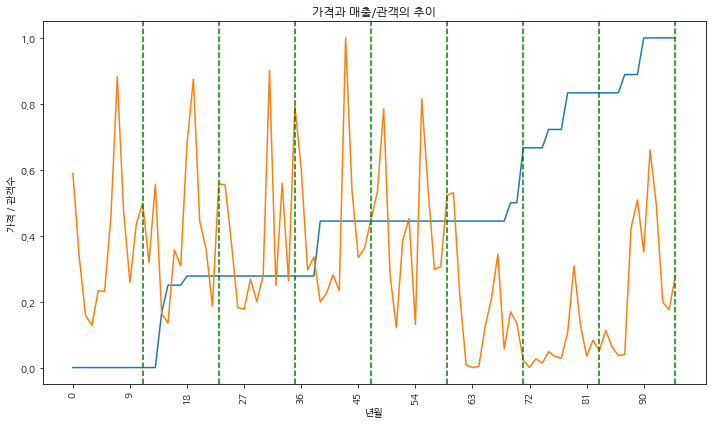

In [130]:
import numpy as np

plt.figure(figsize=(10, 6))

x_ticks = np.arange(0, len(df), len(df)//10)
x_tick_labels = df.index[::len(df)//10]

plt.plot(df['년월'], df['정규화가격'], label='가격')
plt.plot(df['년월'], df['정규화매출액'], label='매출액')
plt.xlabel('년월')
plt.ylabel('가격 / 관객수')
plt.title('가격과 매출/관객의 추이')
plt.xticks(x_ticks, x_tick_labels, rotation='vertical')

august = np.where(df['월'] == 12)[0]
for index in august:
    plt.axvline(x=index, color='green', linestyle='--')
plt.tight_layout()
plt.show()

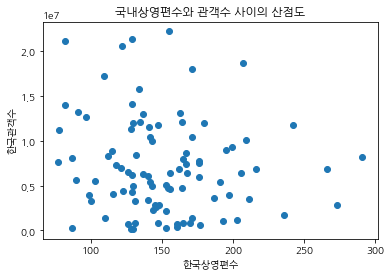

In [72]:
plt.scatter(df['한국상영편수'], df['한국관객수'])
plt.xlabel('한국상영편수')
plt.ylabel('한국관객수')
plt.title('국내상영편수와 관객수 사이의 산점도')
plt.show()